In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [2]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from zipfile import ZipFile #importing ZipFile module
#loading archive.zip and creating zip object
with ZipFile(r"IMDB Dataset.csv.zip","r") as zip:
    zip.extractall()

In [4]:
df=pd.read_csv('IMDB Dataset.csv')

df['review']=df['review'].str.lower()

df['review']=df['review'].str.replace('[^\w\s]','')
df['review']=df['review'].str.replace('<br />','')
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\om\AppData\Local\Temp\ipykernel_14380\899017850.py:5: SyntaxWarning: invalid escape sequence '\w'
  df['review']=df['review'].str.replace('[^\w\s]','')


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


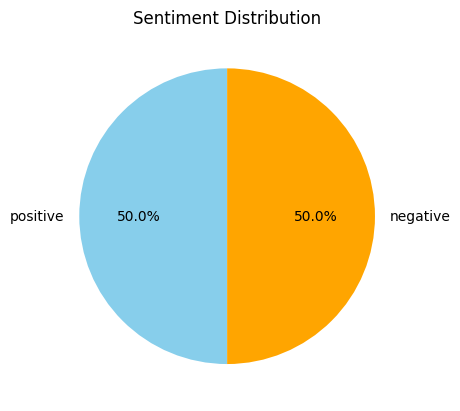

In [5]:
df['sentiment'].value_counts()


plt.pie(df['sentiment'].value_counts(),labels=df['sentiment'].value_counts().index,autopct='%1.1f%%',colors=['skyblue', 'orange'],
       startangle=90)
plt.title('Sentiment Distribution');

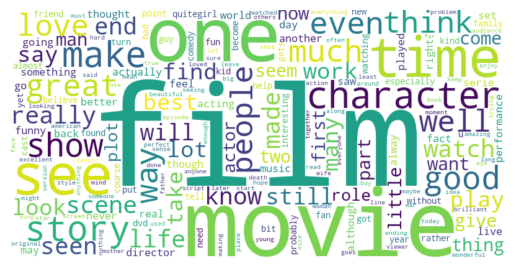

In [6]:
from wordcloud import WordCloud

pos_mask=df[df['sentiment'] == 'positive']['review']
neg_mask=df[df['sentiment'] == 'negative']['review']

wc=WordCloud(width=800, height=400, background_color='white').generate(' '.join(pos_mask))
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show();

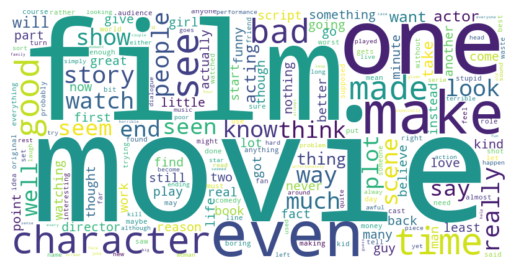

In [7]:
wc_neg=WordCloud(width=800,height=400,background_color='white').generate(' '.join(neg_mask))
plt.figure()
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.show();

In [8]:

stop=stopwords.words('english')

pattern=r'\b(?:' + r'|'.join(re.escape(word) for word in stop) + r')\b'

df['review']=df['review'].str.lower().str.replace(pattern, '', regex=True)

tokens=[word_tokenize(review) for review in df['review']]

In [9]:
from nltk.stem import WordNetLemmatizer

ltz = WordNetLemmatizer()
lemmatize_tokens=[]
for review_token in tokens:
    lemmatized_review = [ltz.lemmatize(token) for token in review_token]
    lemmatize_tokens.append(lemmatized_review)

In [10]:
import string
cleaned_tokens=[]


for review_tokens in lemmatize_tokens:
    filtered_tokens = [token for token in review_tokens if token not in string.punctuation and len(token) > 1]
    cleaned_tokens.append(filtered_tokens)

cleaned_tokens[0]

['one',
 'reviewer',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 '..',
 'aryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 '....',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 'show',
 'dare',
 'forget'

In [11]:
from sklearn.preprocessing import LabelEncoder 

cleaned_reviews = [' '.join(tokens) for tokens in cleaned_tokens]

le=LabelEncoder()
y=le.fit_transform(df['sentiment'])


X_train, X_test, y_train, y_test = train_test_split(cleaned_reviews, y, test_size=0.2, random_state=42,stratify=y)

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [12]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3181362 stored elements and shape (40000, 5000)>

In [13]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [14]:
print("Unique classes in y_train:", np.unique(y_train))

Unique classes in y_train: [0 1]


In [16]:
model=LogisticRegression(
    max_iter=500,
    random_state=42)

model.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=42)

In [20]:
import pickle
with open("sentiment.pkl","wb") as f:
    pickle.dump(model,f)

In [21]:
y_pred = model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.89


In [22]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



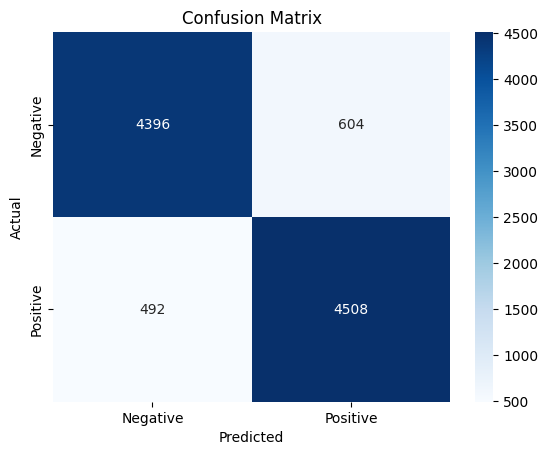

In [23]:
cfm=confusion_matrix(y_test,y_pred)
sns.heatmap(cfm,annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();